In [1]:
# %%bash

# if [ -f '/home/rafsanjani/backup-research' mmseqs/util/bash-completion.sh ]; then
#     source '/home/rafsanjani/backup-research' mmseqs2/util/bash-completion.sh
# fi

### Simple, Fast and Agile:

In [17]:
import pandas as pd
import numpy as np
import esm

In [18]:
# !mmseqs createdb -h

In [19]:
# !wget https://raw.githubusercontent.com/mrzResearchArena/esm-embedding-clustering/main/Datasets/astral-SCOPe-K192.fa

In [20]:
!ls astral-SCOPe-K192*

astral-SCOPe-K192.fa   astral-SCOPe-K192-numerical-header.fa
astral-SCOPe-K192+.fa


In [21]:
# !mmseqs easy-cluster -h

In [22]:
C=0
file = open(file='astral-SCOPe-K192+.fa', mode='w')
for header, sequence in esm.data.read_fasta('astral-SCOPe-K192.fa'):
    header = '+'.join(header.split())
    # print(header)
    file.write(f'{header}\n')
    file.write(f'{sequence}\n')
    C+=1
    # break
file.close()

In [23]:
header

'>d2rsda1+g.50.1.0'

#### Examples:
- mmseqs easy-cluster examples/DB.fasta result tmp
  - result_rep_seq.fasta: Representatives
  - result_all_seq.fasta: FASTA-like per cluster
  - result_cluster.tsv:   Adjacency list
 
- Important parameters: --min-seq-id, --cov-mode, -c

#### Parameters:

![params](mmseqs2-params.png)

In [24]:
!mmseqs easy-cluster \
    astral-SCOPe-K192+.fa\
    clusterFiles temporary\
    --cov-mode 1\
    -c 0.80\
    --cluster-reassign 0\
    --max-iterations 5000\
    --cluster-steps 9\
    -v 0

In [25]:
!ls clusterFiles*

clusterFiles_all_seqs.fasta  clusterFiles_rep_seq.fasta
clusterFiles_cluster.tsv


In [26]:
cat clusterFiles_all_seqs.fasta | head -10

>d1sp3a_+a.138.1.3
>d1sp3a_+a.138.1.3
ANPHKDVLKGPFTTGSEVTTQCLTCHEEQATDMMKTSHWTWELEQKLPDRTVVRGKKNSINNFCVAISSNEPRCTSCHAGYGWKDNTFDFKDKTKVDCLICHDTTGTYVKDPAGAGEPMAKLDLAKIAQNVGAPVRDNCGSCHFYGGGGDAVKHGDLDSSMAYPDKATDVHMDSDGNNFQCQNCHTTEKHQISGNAMGVSPGGIDHIGCENCHDSAPHSNKKLNTHTATVACQTCHIPFFAKNEPTKMQWDWSTAGDDKPETVDQYGKHTYQKKKGNFVWEKMVKPQYAWYNGTANAYMAGDKMDSNVVTKLTYPMGDINDAKAKIYPFKVHTGKQIYDKKLNIFITPKTYGKGGYWSEFDWNLAAKLGMEANPTMLEKGIKYSGEYDFAATEMWWRINHMVSPKEQALNCNDCHNKGTRLDWQALGYQGDPMKNKQGPKHK
>d2j7aa_+a.138.1.3
>d2j7aa_+a.138.1.3
GCSDVSTELKTPVYKTKLTAEEIRNSAFKPEFPKQYASYERNDETTVMTEYKGSVPFNKNDNVNPLPEGYRHAQPYLKNLWLGYPFMYEYREARGHTYAIQDFLHIDRINRYAEKGGLPATCWNCKTPKMMEWVKESGDGFWAKDVNEFRDKIDMKDHTIGCATCHDPQTMELRITSVPLTDYLVSQGKDPKKLPRNEMRALVCGQCHVEYYFNGPTMGVNKKPVFPWAEGFDPADMYRYYDKHGDLQVKGFEGKFADWTHPASKTPMIKAQHPEYETWINGTHGAAGVTCADCHMSYTRSDDKKKISSHWWTSPMKDPEMRACRQCHSDKTPDYLKSRVLFTQKRTFDLLLAAQEVSVKAHEAVRLANEYQGAKAAGYDDLMIQAREMVRKGQFFWDYVSAENSVGFHNPAKALDTLAQSQQFSQKAIDLAMEATQYGIGKDLSGDIKTIVPPILKMNRKLQQDPEFMKTHKWFQYLPVL

In [27]:
cat clusterFiles_rep_seq.fasta | head -10

>d6avya_+c.69.1.0 
YGRTHVVRPKGTHKATIVWLHGLGDNGTSWSQLLETLPLPNIKWICPTAPSRPVSLFGGFPCTAWFDVADLSEDAPDDTEGMDASAAHVANLLSTEPADIKLGVGGFSMGAATALYSATCFAHGKYGNGNPYPVNLSLAVGLSGWLPCARTLKNRIEASPEAAQRASTIPLLLCHGKADDVVLYKHGQRSTDALKANGFSNVLFKSYNSLGHYTVPEEMDEVCKWLTANLG
>d6tj2a_+c.69.1.0 
TPLTFVLIHGSWATAGFWDETASELRKLGHTVYTPEYAGHGADKNNNVTHEQITKSVVDYIKQKDLKDFILLGHSFGGSVIQTVSQQVPDRIKRIVFFDAFAPLDGQSVADQFPAESLKSFEQLRDASGNNTITLPFPLFRDTFVNTASLAQAQAFYKQAPPEPATPLFEKLDLKKFYSLQIPKSYLYLTEDTAIPQGPYGFHPTQSSHLGVFRFIEGKGDHMTTVRTEPKMMAELMVKAGRD
>d4q34a_+c.69.1.0 
ERVLMVDEQGSFAVGGTVLVDSLGHTFHGDHAYVFYQKPVGARKYPLVFAHGVGQFSKTWETTPDGREGFQNIFLRRRFCVYLVDQPRRGNAGRGTESVTISPAFDEEVWFNRFRVGIWPDYFEGVQFKRDKETLDQYFRQMTPTIGTTDFEVYSDAYAALFDKIGPGVFITHSQGGPVGWNTLLKTRNIKAIASYEPGGAVPFPEGQLPEEAKFITLSKKMEGIEVPMSVFMEYTKVPIVIYYGDNLPETDERPELYEWTRRLRLMKIWAKMLNDQGGDVTVIHLPEVGLHGNTHFPMSDLNNIEVADLLSEWLHTKALD
>d2psda_+c.69.1.0 
KVYDPEQRKRMITGPQWWARCKQMNVLDSFINYYDSEKHAENAVIFLHGNATSSYLWRHVVPHIEPVARCIIPDLIGMGKSGKSGNGSYRLLDHYKYLTAWFELLNLPKKIIFVGHDWGAALAFHY

In [28]:
table = pd.read_csv('clusterFiles_cluster.tsv', sep='\t', header=None)
table

,0,1
0,d4a2ba2+c.55.1.1,d4a2ba2+c.55.1.1
1,d2zgya1+c.55.1.1,d2zgya1+c.55.1.1
2,d2zgya2+c.55.1.1,d2zgya2+c.55.1.1
3,d1jcfa2+c.55.1.1,d1jcfa2+c.55.1.1
4,d1jcfa2+c.55.1.1,d4czga2+c.55.1.0
...,...,...
24573,d1zaqa_+g.3.11.1,d3gisx1+g.3.11.0
24574,d1adxa_+g.3.11.1,d1adxa_+g.3.11.1
24575,d1adxa_+g.3.11.1,d1dx5i2+g.3.11.1
24576,d1kloa1+g.3.11.2,d1kloa1+g.3.11.2


In [29]:
def showD(d):
    C = 1
    for key, value in d.items():
        print(f'{key}: {value}')
        if C==10: break
        C+=1
    #end-for
#end-def

In [30]:
centroids = table[0]
print(centroids)
print(len(set(centroids)))

0        d4a2ba2+c.55.1.1
1        d2zgya1+c.55.1.1
2        d2zgya2+c.55.1.1
3        d1jcfa2+c.55.1.1
4        d1jcfa2+c.55.1.1
               ...       
24573    d1zaqa_+g.3.11.1
24574    d1adxa_+g.3.11.1
24575    d1adxa_+g.3.11.1
24576    d1kloa1+g.3.11.2
24577    d1kloa2+g.3.11.2
Name: 0, Length: 24578, dtype: object
4802


In [31]:
sequenceIDs = table[1]
sequenceIDs
print(sequenceIDs)
print(len(set(sequenceIDs)))

0        d4a2ba2+c.55.1.1
1        d2zgya1+c.55.1.1
2        d2zgya2+c.55.1.1
3        d1jcfa2+c.55.1.1
4        d4czga2+c.55.1.0
               ...       
24573    d3gisx1+g.3.11.0
24574    d1adxa_+g.3.11.1
24575    d1dx5i2+g.3.11.1
24576    d1kloa1+g.3.11.2
24577    d1kloa2+g.3.11.2
Name: 1, Length: 24578, dtype: object
24578


In [32]:
d = dict(zip(sequenceIDs, centroids))

In [33]:
showD(d)

d4a2ba2+c.55.1.1: d4a2ba2+c.55.1.1
d2zgya1+c.55.1.1: d2zgya1+c.55.1.1
d2zgya2+c.55.1.1: d2zgya2+c.55.1.1
d1jcfa2+c.55.1.1: d1jcfa2+c.55.1.1
d4czga2+c.55.1.0: d1jcfa2+c.55.1.1
d1saza1+c.55.1.2: d1saza1+c.55.1.2
d1saza2+c.55.1.2: d1saza2+c.55.1.2
d1ig8a2+c.55.1.3: d1ig8a2+c.55.1.3
d3b8ax2+c.55.1.0: d1ig8a2+c.55.1.3
d3o4wa2+c.55.1.0: d1ig8a2+c.55.1.3


In [34]:
len(set(d.keys()))

24578

In [35]:
len(set(d.values()))

4802

In [36]:
results = {}
for key, value in d.items():
    sequenceID = key.split('+')[0]
    superfamily = value.split('+')[1]
    superfamily = '.'.join(superfamily.split('.')[0:-1])
    
    # print(sequenceID)
    # print(superfamily)
    
    results[sequenceID] = superfamily
    
    # break
#end-for

In [37]:
showD(results)

d4a2ba2: c.55.1
d2zgya1: c.55.1
d2zgya2: c.55.1
d1jcfa2: c.55.1
d4czga2: c.55.1
d1saza1: c.55.1
d1saza2: c.55.1
d1ig8a2: c.55.1
d3b8ax2: c.55.1
d3o4wa2: c.55.1


In [38]:
len(set(results.keys()))

24578

In [39]:
len(set(results.values()))

192

In [40]:
print(results['d1ux8a_'])
print(results['d2e6sa1'])

a.1.1
g.50.1


In [41]:
C=1
clusterResults = []
for header, sequence in esm.data.read_fasta('astral-SCOPe-K192.fa'):
    
    header = header.split()[0][1:]
    # print(header)
    
    clusterResults.append(results[header])
    
    # if C==10: break
    # C+=1

In [42]:
# clusterResults

In [43]:
C=1
origin = []
for header, _ in esm.data.read_fasta('astral-SCOPe-K192.fa'):
    
    header = '.'.join(header.split()[1].split('.')[:-1])
    origin.append(header)
    
    # if C==10: break
    # C+=1

In [44]:
C = 0
for y, yp in zip(origin, clusterResults):
    if y == yp:
        C += 1
print(C)

24565


In [45]:
# clusterResults

In [46]:
np.save(arr=clusterResults, file='outputMMseqs2')

In [47]:
# C=0
# for sequenceID, centroid in zip(sequenceIDs, centroids):
#     if sequenceID == centroid:
#         C+=1
#     #end-for
# #end-for
# print(f'Matched: {C} of {len(sequenceIDs)}')
# print(f'{(C/len(sequenceIDs))*100.0:.2f}')

In [48]:
# centroids = np.array(centroids)
# print(centroids)

In [49]:
# sequenceIDs = np.array(sequenceIDs)
# print(sequenceIDs)

In [50]:
# d = dict(zip(sequenceIDs, centroids))
# # print(d)

In [51]:
# len(set(d.keys()))

In [52]:
# len(set(d.values()))

In [53]:
# C=0
# for header, sequence in esm.data.read_fasta('astral-SCOPe-K192.fa'):
#     print(header)
#     break
# #for-end

In [54]:
# V = []
# for centroid in centroids:
#     # V.append(centroid.split('+')[1])
#     print(centroid.split('+')[1])
# #end-for

In [55]:
# V[:10]

In [56]:
# centroids = V

### Re-programmed with numerical header:

In [57]:
# C=0
# file = open(file='astral-SCOPe-K192-numerical-header.fa', mode='w')
# for header, sequence in esm.data.read_fasta('astral-SCOPe-K192.fa'):
#     file.write(f'>{C}\n')
#     file.write(f'{sequence}\n')
#     C+=1
#     # break
# file.close()

In [58]:
# C=0
# file = open(file='astral-SCOPe-K192-numerical-header.fa', mode='w')
# for header, sequence in esm.data.read_fasta('astral-SCOPe-K192.fa'):
#     file.write(f'>{C}\n')
#     file.write(f'{sequence}\n')
#     C+=1
#     # break
# file.close()

In [59]:
# !ls astral-SCOPe-K192*

In [60]:
# !mmseqs easy-cluster \
#     astral-SCOPe-K192-numerical-header.fa\
#     clusterFiles temporary\
#     --cov-mode 1\
#     -c 0.80\
#     --cluster-reassign 0\
#     --max-iterations 5000\
#     --cluster-steps 9\
#     -v 0

In [61]:
# !ls clusterFiles*

In [62]:
# cat clusterFiles_all_seqs.fasta | head -10

In [63]:
# table = pd.read_csv('clusterFiles_cluster.tsv', sep='\t', header=None)
# table

In [64]:
# centroids = table[0]
# centroids

In [65]:
# w = np.array(centroids)

In [66]:
# len(set(w))

In [67]:
# sequenceIDs = table[1]
# sequenceIDs

In [68]:
# C=0
# for sequenceID, centroid in zip(sequenceIDs, centroids):
#     if sequenceID == centroid:
#         C+=1
#     #end-for
# #end-for

In [69]:
# print(f'Matched: {C} of {len(sequenceIDs)}')
# print(f'{(C/len(sequenceIDs))*100.0:.2f}')

### Optional: Performance

- It testifies to the retrieval of superfamilies.

In [70]:
import pandas as pd
import numpy as np
import esm

In [71]:
datasetLocation = 'astral-SCOPe-K192.fa'

In [72]:
# C=1
superfamilies = []
# loopUpTable = {}
seqIDs = []
for header, _seq in esm.data.read_fasta(datasetLocation):
    seqIDs.append(header.split()[0][1:])
    superfamily = '.'.join(header.split()[1].split('.')[0:-1])
    superfamilies.append(superfamily)
    
    # print(header.split()[0][1:])
    # print(superfamily)
    
    # loopUpTable[]
    
    # break
    
    # if C==10: break
    # C+=1
#end-for

In [73]:
inLookUpTable = dict(zip(seqIDs, superfamilies))

In [74]:
# inLookUpTable

In [75]:
# superfamilies[:20]

In [76]:
# Y = superfamilies

In [77]:
!mmseqs easy-cluster \
    astral-SCOPe-K192.fa\
    clusterFiles temporary\
    --cov-mode 1\
    -c 0.80\
    --cluster-reassign 0\
    --max-iterations 5000\
    -v 0

In [78]:
!ls clusterFiles_cluster*

clusterFiles_cluster.tsv


In [79]:
table = pd.read_csv('clusterFiles_cluster.tsv', sep='\t', header=None)
table

,0,1
0,d2k54a1,d2k54a1
1,d2i9wa1,d2i9wa1
2,d3grda_,d3grda_
3,d3grda_,d3ebta1
4,d3grda_,d3ec9a1
...,...,...
24573,d2m9ya1,d1wd2a1
24574,d2m9ya1,d2lwra1
24575,d3jb9s1,d3jb9s1
24576,d3jb9s1,d2baya_


In [80]:
Cs = table[0]
len(set(Cs))

4943

In [81]:
seqIDs = table[1]
len(set(seqIDs))

24578

In [82]:
Cs = np.array(Cs)
print(Cs)

seqIDs = np.array(seqIDs)
print(seqIDs)

['d2k54a1' 'd2i9wa1' 'd3grda_' ... 'd3jb9s1' 'd3jb9s1' 'd3jb9s1']
['d2k54a1' 'd2i9wa1' 'd3grda_' ... 'd3jb9s1' 'd2baya_' 'd6id0q1']


In [83]:
C=0
for c, seqID in zip(Cs, seqIDs):
    if c==seqID:
        C+=1
print(C)

4943


In [84]:
outLookUpTable = dict(zip(seqIDs, Cs))

In [85]:
# outLookUpTable

In [86]:
C=0
for key, value in outLookUpTable.items():
    if key == value:
        C+=1
print(C)

4943


In [87]:
modifiedOutLookUpTable = {}
for key, value in outLookUpTable.items():
    modifiedOutLookUpTable[key] = inLookUpTable[value]

# {'d2qy0a2': 'd2qy0a2',
#  'd1md8a2': 'd2qy0a2',
#  'd5ubmb2': 'd2qy0a2',
#  'd1elva2': 'd2qy0a2',
#  'd3gova2': 'd2qy0a2',...

In [88]:
# modifiedOutLookUpTable

In [89]:
C = 0
for header, _seq in esm.data.read_fasta(datasetLocation):
    seqID = header.split()[0][1:]
    # print(seqID)
    y  = inLookUpTable[seqID] 
    yp = modifiedOutLookUpTable[seqID]
    
    if y == yp:
        C+=1
    #end-if
#end-for

print(C)

24565


In [90]:
# Y

In [91]:
# modifiedOutLookUpTable

In [92]:
len(set(modifiedOutLookUpTable.values()))

192

In [93]:
len(set(modifiedOutLookUpTable.keys()))

24578

In [94]:
counter = {}
for key, value in modifiedOutLookUpTable.items():
    # print(key, value)
    # print(type(key))
    # break
    if value not in counter:
        counter[value] = 1
    else:
        counter[value] += 1
    # break

In [95]:
# counter

In [96]:
counter =sorted(counter.items(), key=lambda x: x[1], reverse=True)

In [97]:
# counter

In [98]:
superfamilies = []
members = []
for v in counter:
    superfamilies.append(v[0])
    members.append(v[1])
#end-for

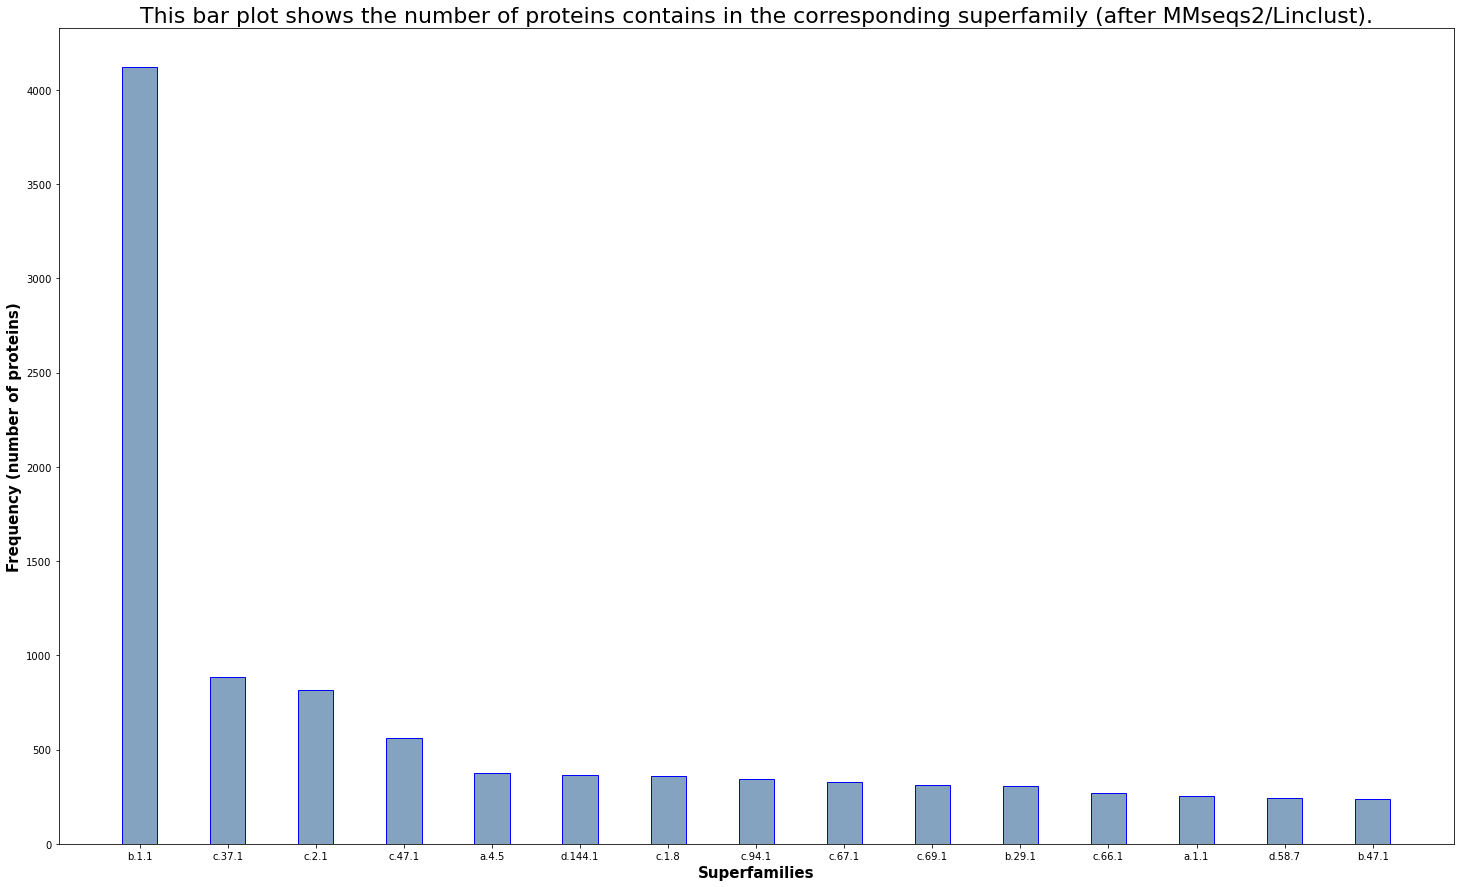

In [99]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (25, 15))
plt.bar(superfamilies[:15], members[:15], width = 0.4, color=(0.2, 0.4, 0.6, 0.6),  edgecolor='blue')
plt.xlabel('Superfamilies', fontweight='bold', fontsize=15)
plt.ylabel('Frequency (number of proteins)', fontweight='bold', fontsize=15)
plt.title('This bar plot shows the number of proteins contains in the corresponding superfamily (after MMseqs2/Linclust).', fontsize=22)
plt.savefig(f'images-PNG/output.png')
plt.savefig(f'images-JPG/output.jpg')

In [100]:
# C = 1
# for i in range(15, len(members), 15):
#     fig = plt.figure(figsize = (25, 15))
#     plt.bar(superfamilies[i-15:i], members[i-15:i], width = 0.4, color=(0.2, 0.4, 0.6, 0.6),  edgecolor='blue')
#     plt.xlabel('Superfamilies', fontweight='bold', fontsize=15)
#     plt.ylabel('Frequency (number of proteins)', fontweight='bold', fontsize=15)
#     plt.title('This bar plot shows the number of proteins contains in the corresponding superfamily.', fontsize=22)
#     plt.savefig(f'images-PNG/{(i+1)-15}-{i}.png')
#     plt.savefig(f'images-JPG/{(i+1)-15}-{i}.jpg')
#     if C==5: break
#     C+=1
#     # plt.show()
# #end-for

In [101]:
# members
superfamilies[:15]

['b.1.1',
 'c.37.1',
 'c.2.1',
 'c.47.1',
 'a.4.5',
 'd.144.1',
 'c.1.8',
 'c.94.1',
 'c.67.1',
 'c.69.1',
 'b.29.1',
 'c.66.1',
 'a.1.1',
 'd.58.7',
 'b.47.1']

In [102]:
C = 1

d = {}
for header, sequence in esm.data.read_fasta(datasetLocation):
    header = '.'.join(header.split()[1].split('.')[0:-1])
    
    # print(header)
    
    if header not in d:
        d[header] = 1
    else:
        d[header] += 1
    
    # print()
    # if C==10: break
    # C += 1
#end-for

In [103]:
originalCounter =sorted(d.items(), key=lambda x: x[1], reverse=True)

In [104]:
# originalCounter

In [105]:
originalSuperfamilies = []
originalMembers = []
for v in originalCounter:
    originalSuperfamilies.append(v[0])
    originalMembers.append(v[1])
#end-for

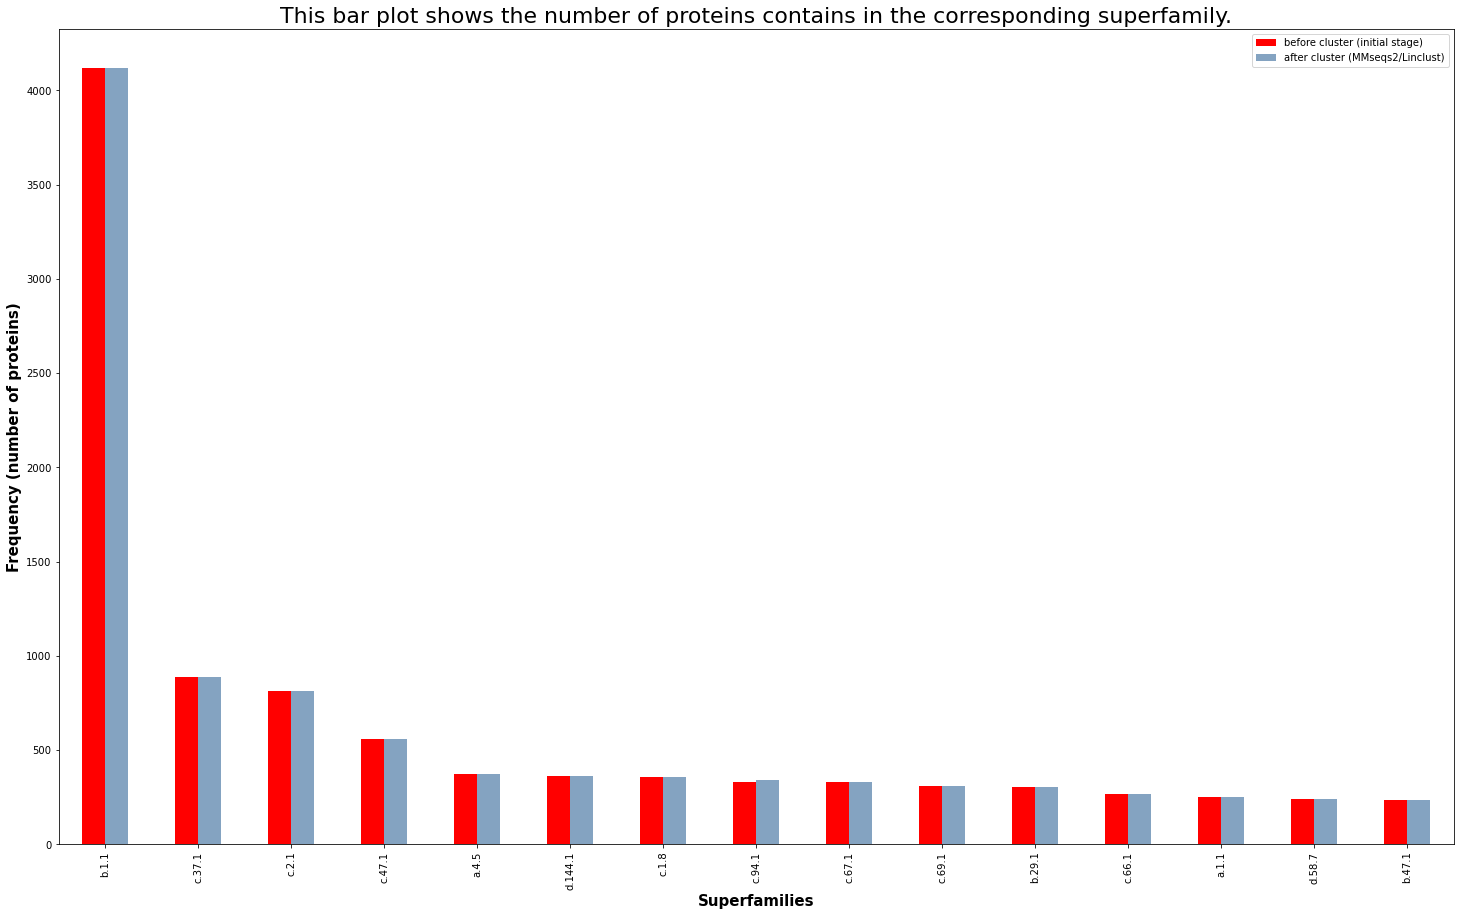

In [106]:
# fig = plt.figure(figsize = (25, 15))
plotdata = pd.DataFrame({
    "before cluster (initial stage)": originalMembers[:15],
    "after cluster (MMseqs2/Linclust)": members[:15]},
    index=superfamilies[:15]
)

plotdata.plot(kind="bar",figsize=(25, 15), color={'after cluster (MMseqs2/Linclust)': (0.2, 0.4, 0.6, 0.6), 'before cluster (initial stage)': 'red'})
# (0.2, 0.4, 0.6, 0.6)


# index=["Django", "Gafur", "Tommy", "Ronnie"])
#superfamilies[:15], members[:15]

# color=(0.2, 0.4, 0.6, 0.6)

plt.xlabel('Superfamilies', fontweight='bold', fontsize=15)
plt.ylabel('Frequency (number of proteins)', fontweight='bold', fontsize=15)
plt.title('This bar plot shows the number of proteins contains in the corresponding superfamily.', fontsize=22)
# plt.savefig(f'images-PNG/compared.png')
# plt.savefig(f'images-JPG/compared.jpg')

plt.show()

In [107]:
# help(plotdata.plot)

### All superfamilies compared (MMseqs2/Linclust):

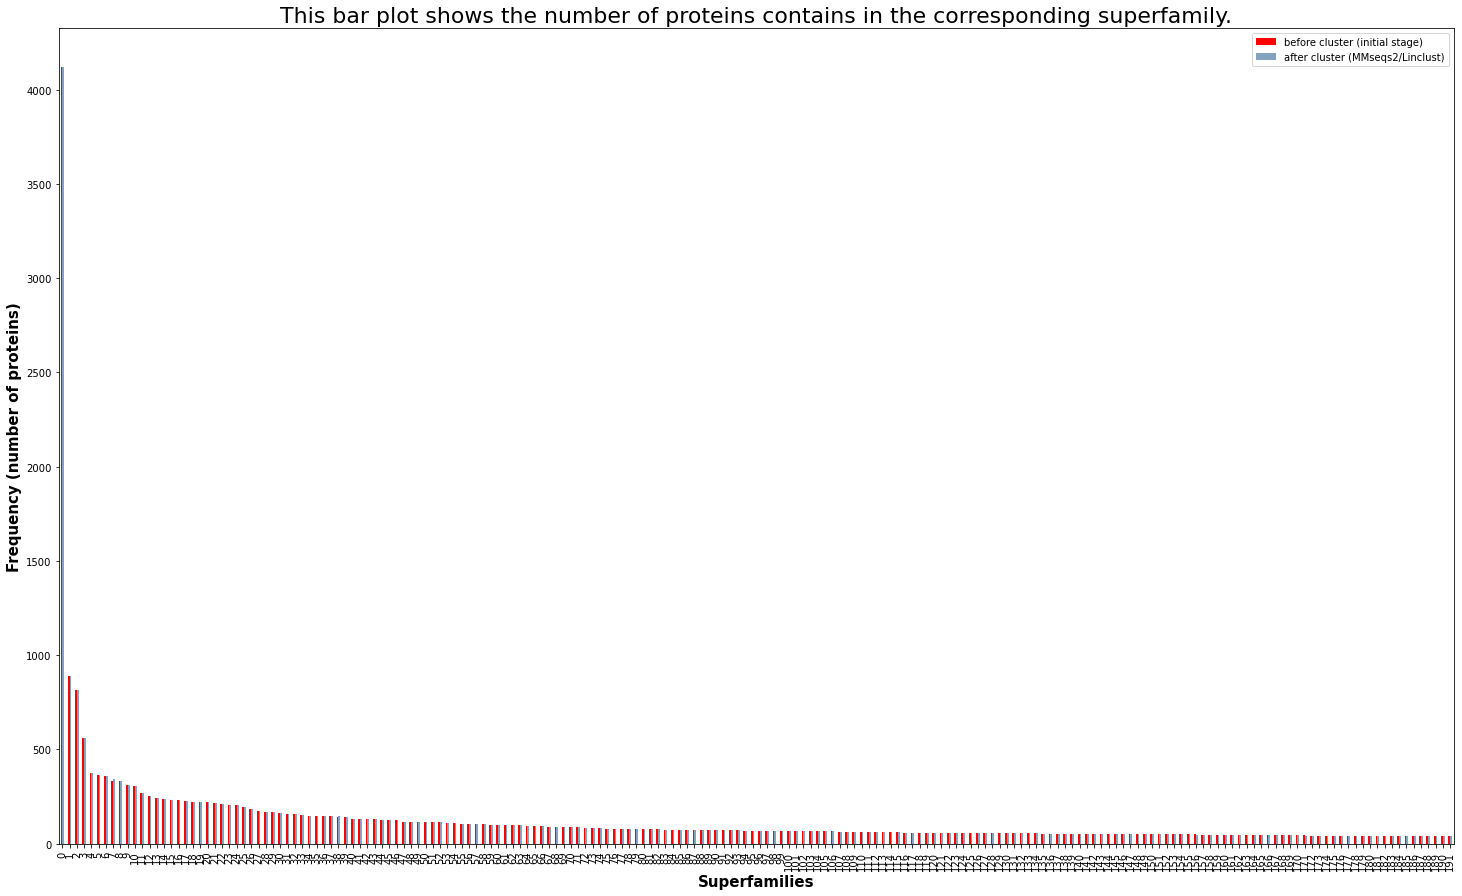

In [108]:
# fig = plt.figure(figsize = (25, 15))
plotdata = pd.DataFrame({
    "before cluster (initial stage)": originalMembers[:],
    "after cluster (MMseqs2/Linclust)": members[:]},
    index=range(len(superfamilies[:]))
)

plotdata.plot(kind="bar",figsize=(25, 15), color={'after cluster (MMseqs2/Linclust)': (0.2, 0.4, 0.6, 0.6), 'before cluster (initial stage)': 'red'})
# (0.2, 0.4, 0.6, 0.6)


# index=["Django", "Gafur", "Tommy", "Ronnie"])
#superfamilies[:15], members[:15]

# color=(0.2, 0.4, 0.6, 0.6)

plt.xlabel('Superfamilies', fontweight='bold', fontsize=15)
plt.ylabel('Frequency (number of proteins)', fontweight='bold', fontsize=15)
plt.title('This bar plot shows the number of proteins contains in the corresponding superfamily.', fontsize=22)
plt.savefig(f'images-PNG/All-Compared.png', dpi=600)
plt.savefig(f'images-JPG/All-Compared.jpg', dpi=600)

plt.show()

In [109]:
# help(plt.savefig)